In [ ]:
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scienceplots

base_path = "../data/processed_data/" #+ "without_maw_rte/" 
path_counter = base_path + "counter/"
path_mean_std = base_path + "mean_std/"

base_plot_path = "./plots/"

base_name = "results_{}__{}_{}.pt"

model_list = ['Llama-2-7b-hf', 'phi-2', 'Mistral-7B-v0.1', 'Baichuan-7B', 'Qwen2.5-7B'] 


dataset_list = ['c4', 'oscar', 'redpajama', 'pile', 'gsm8k', 'svamp', 'mawps', 'anli_r1', 'esnli', 'rte', 'boolq', 'commonsense_qa', 'race',
                'winogrande', 'wmt14', 'iwslt', 'opc', 'ds1000', 'mbpp', 'ellipses', 'random']


non_sensical_data = ['ellipses', 'random']

runs = range(len(dataset_list))
print("Number of datasets: ", len(dataset_list))


#mawps, rte tested with float32. All others with float16
plt.style.use('science')

sns.set_context("notebook", rc={
    "axes.linewidth": 0.5,
    "axes.titlesize": 22,
    "axes.labelsize": 18,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
})

Number of datasets:  21


In [ ]:
#DA rivedere per tutti i modelli...

path = "../data/processed_data/specs_layers.csv"
name_csv = pd.read_csv(path)
name_csv = name_csv[name_csv["layer"]==0]
#print(name_csv)

dictionary_components = {}

for model in model_list:
    print(model)
    model_data = name_csv[name_csv["model"]==model]
    
    components_names = [model_data.iloc[i]["name"] for i in range(len(model_data))]
    
    components_ids = range(1, len(components_names) + 1)

    dictionary_model = {key: value for key, value in zip(components_ids, components_names)}
    dictionary_components[model] = dictionary_model

print(dictionary_components)

Llama-2-7b-hf
phi-2
Mistral-7B-v0.1
Baichuan-7B
Qwen2.5-7B
{'Llama-2-7b-hf': {1: 'self_attn.q_proj', 2: 'self_attn.k_proj', 3: 'self_attn.v_proj', 4: 'self_attn.o_proj', 5: 'mlp.gate_proj', 6: 'mlp.up_proj', 7: 'mlp.down_proj'}, 'phi-2': {1: 'self_attn.q_proj', 2: 'self_attn.k_proj', 3: 'self_attn.v_proj', 4: 'self_attn.dense', 5: 'mlp.fc1', 6: 'mlp.fc2'}, 'Mistral-7B-v0.1': {1: 'self_attn.q_proj', 2: 'self_attn.k_proj', 3: 'self_attn.v_proj', 4: 'self_attn.o_proj', 5: 'mlp.gate_proj', 6: 'mlp.up_proj', 7: 'mlp.down_proj'}, 'Baichuan-7B': {1: 'self_attn.W_pack', 2: 'self_attn.o_proj', 3: 'mlp.gate_proj', 4: 'mlp.down_proj', 5: 'mlp.up_proj'}, 'Qwen2.5-7B': {1: 'self_attn.q_proj', 2: 'self_attn.k_proj', 3: 'self_attn.v_proj', 4: 'self_attn.o_proj', 5: 'mlp.gate_proj', 6: 'mlp.up_proj', 7: 'mlp.down_proj'}}


In [3]:
#Create a custom color palette for the plot

original_cmap = sns.color_palette("Spectral_r", as_cmap=True) 
colors = np.concatenate((original_cmap(np.linspace(0, 0.35, 4)), original_cmap(np.linspace(0.7, 1, 4))), axis=0) # Extract 10 colors
custom_palette = np.clip(colors, 0, 1) # Ensure valid RGB range
custom_palette = [tuple(c) for c in custom_palette]  # Convert array to list of 


palette_heatmap =  sns.color_palette("Blues", as_cmap=True) 
colors_blues = np.concatenate((palette_heatmap(np.linspace(0, 0.35, 1)), palette_heatmap(np.linspace(0.8, 1, 10))), axis=0) # Extract 10 colors
custom_blues = np.clip(colors_blues, 0, 1) # Ensure valid RGB range
custom_blues = [tuple(c) for c in custom_blues]  # Convert array to list of 

one_color = sns.color_palette("mako", as_cmap=True).colors[190]

In [4]:
results_cosine_similarity = pd.read_csv(base_path + "similarity_results.csv")
results_cosine_similarity = results_cosine_similarity[results_cosine_similarity["model"].isin(model_list)]

all_categories_names = ['general_datasets', 'aritm_reasoning', 'nlu_inference', 'commonsense_qa', 'translation', 'coding']
all_categories_names_print = ['Language Modeling', 'Mathematical Reasoning', 'NLI', 'Question Answering', 'Translation', 'Coding']

rename_dictionary = {all_categories_names[i]: all_categories_names_print[i] for i in range(len(all_categories_names))} 
rename_dictionary.update({'non_sensical': 'Non sensical'})


<h1> Results w.r.t. category:</h1>

/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_4641/313254629.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_i["comparison_group"] = data_i["comparison_group"].map(rename_dictionary)
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_4641/313254629.py:25: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.boxplot(data=data_i, x="dataset", y="mean_similarity_wrt_comparison_group", hue="comparison_group", ax=ax[y_index, x_index], palette=custom_palette)
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_4641/313254629.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

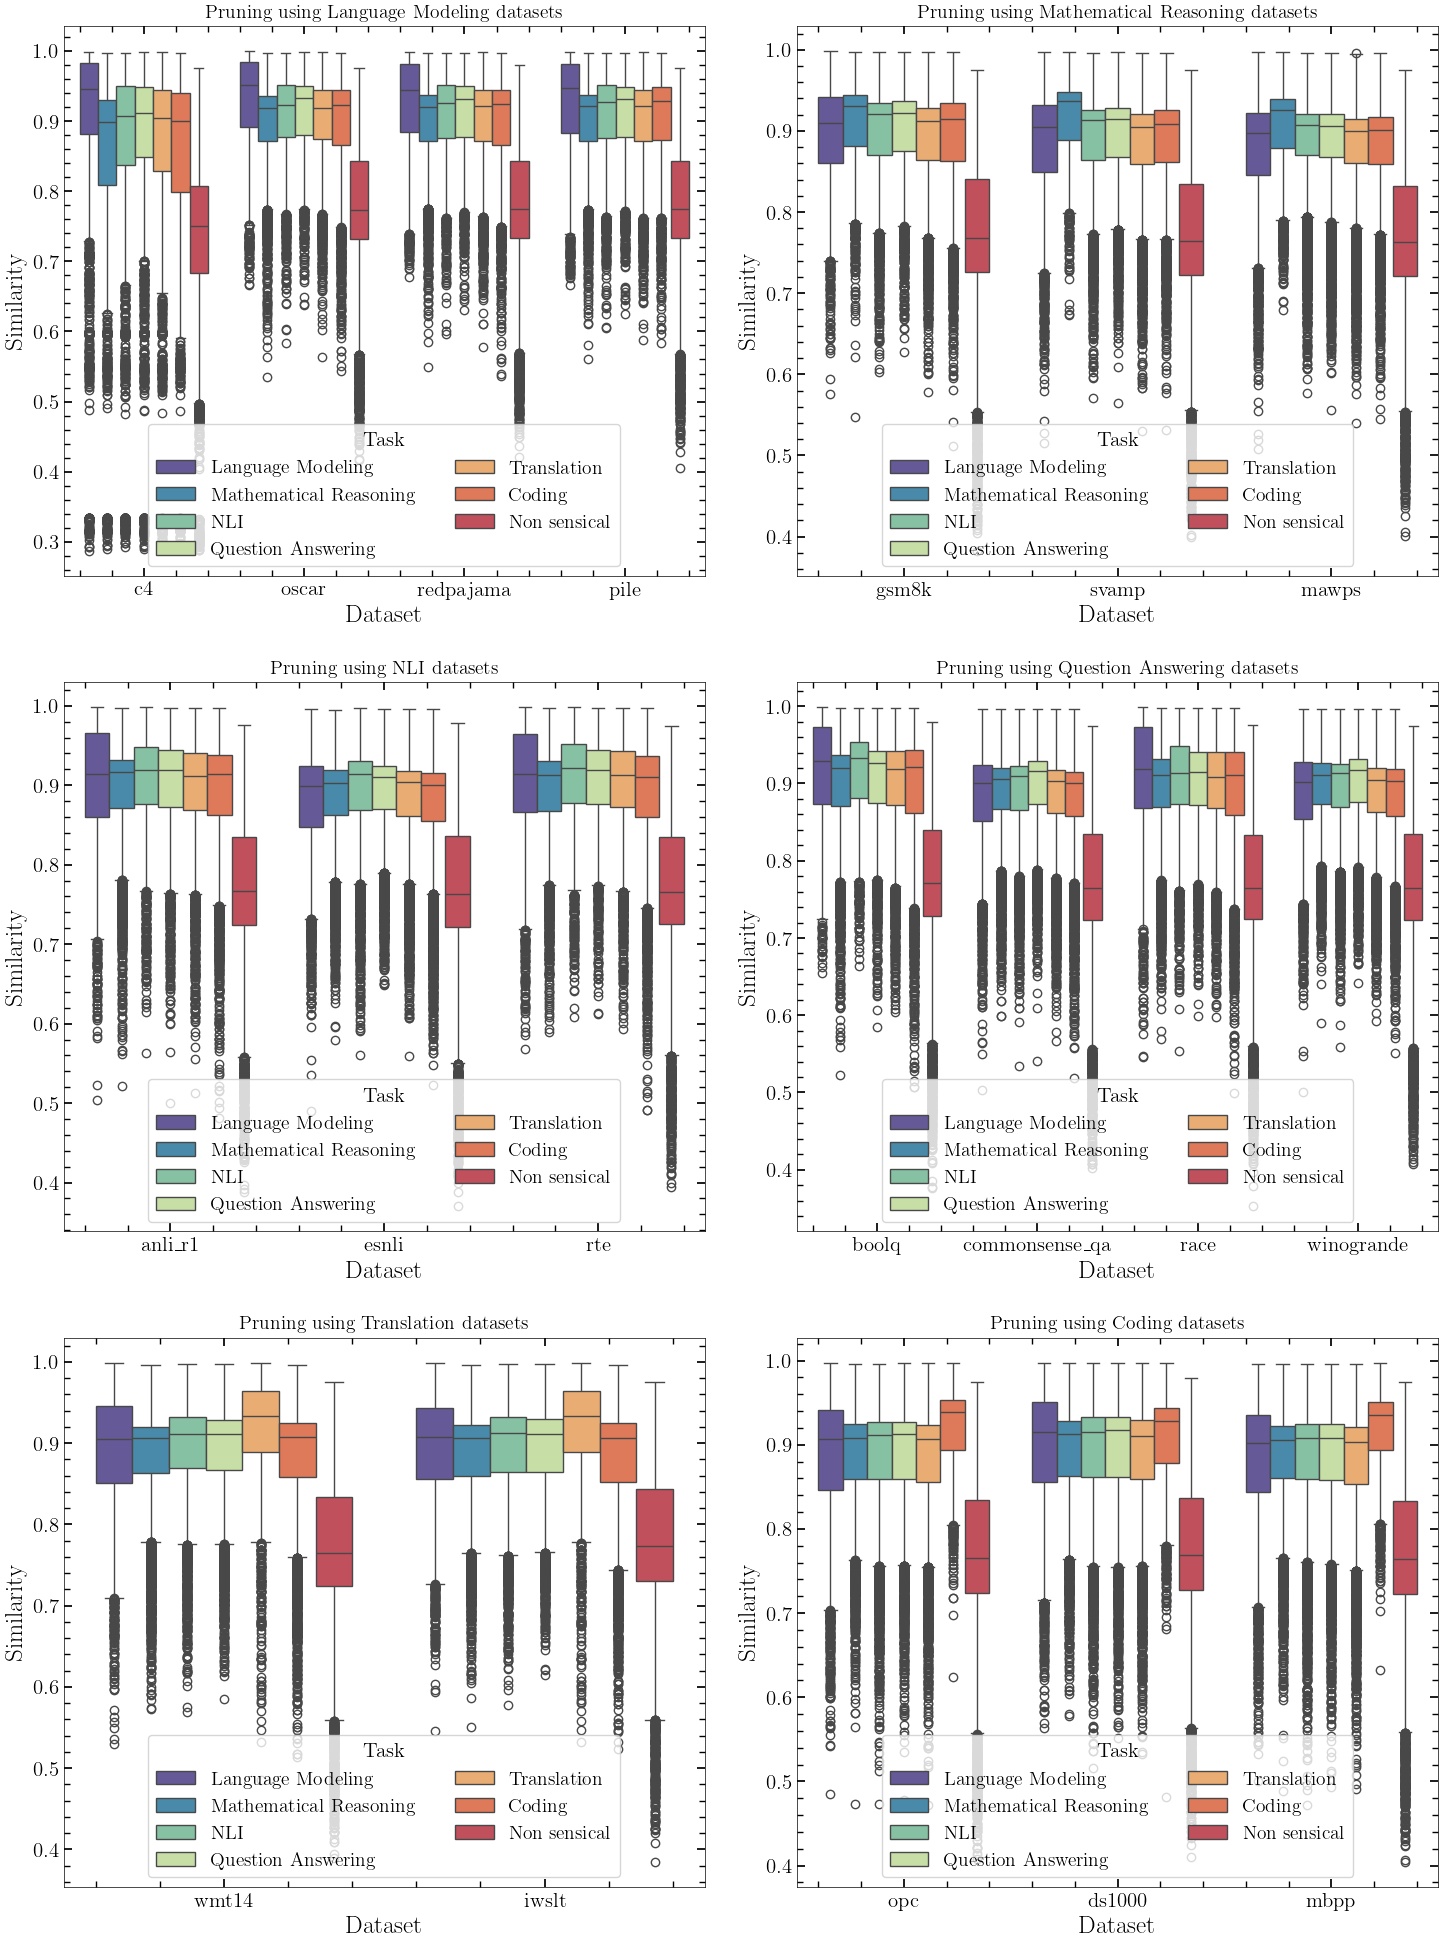

In [5]:
model_and_avg = ['avg'] # + model_list

for model in model_and_avg:
    
    if model == 'avg':
        results_cosine_similarity_model = results_cosine_similarity
    else:
        results_cosine_similarity_model = results_cosine_similarity[results_cosine_similarity["model"] == model]
    
    figure, ax = plt.subplots(3, 2, figsize=(15, 20))
    
    if model != 'avg':
        figure.suptitle(model + ": cosine similarity between the mean score of each dataset and the categories", fontsize=16)

    x_index = 0
    y_index = 0

    for i in range(len(all_categories_names)):
        
        #data_i = results_cosine_similarity_model[results_cosine_similarity_model["source_group"] == all_categories_names[i]]
        data_i = results_cosine_similarity_model[(results_cosine_similarity_model["source_group"] == all_categories_names[i])] # & (results_cosine_similarity_model["comparison_group"] != "boh")]
        
        data_i["comparison_group"] = data_i["comparison_group"].map(rename_dictionary)
        
        sns.boxplot(data=data_i, x="dataset", y="mean_similarity_wrt_comparison_group", hue="comparison_group", ax=ax[y_index, x_index], palette=custom_palette)
        ax[y_index, x_index].set_title("Pruning using " + all_categories_names_print[i] + " datasets", fontsize=14)
        ax[y_index, x_index].set_xlabel("Dataset")
        ax[y_index, x_index].set_ylabel("Similarity")
        
        
        ax[y_index, x_index].legend(title="Task", loc='lower center', title_fontsize=15, fontsize=14, ncol=2,frameon=True)
        
        
        #if all_categories_names[i] != "boh":
            #ax[y_index, x_index].set_ylim(0.9, 1)
        
        x_index += 1
        if x_index == 2:
            x_index = 0
            y_index += 1

    figure.tight_layout(pad=2.0)
    plt.show()

<h1>Similarity w.r.t sparsity</h1>

/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_4641/2759151664.py:19: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.boxplot(data=data_i, x="comparison_group", y="mean_similarity_wrt_comparison_group", hue="sparsity", ax=ax[y_index, x_index], palette=custom_palette)
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_4641/2759151664.py:19: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.boxplot(data=data_i, x="comparison_group", y="mean_similarity_wrt_comparison_group", hue="sparsity", ax=ax[y_index, x_index], palette=custom_palette)
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_4641/2759151664.py:19: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.boxplot(data=data_i, x="comparison_group", y="mean_similarity_wrt_comparison_group", hue="sparsity", ax=ax[y_index, x_index], palette=custom_palette)
/var

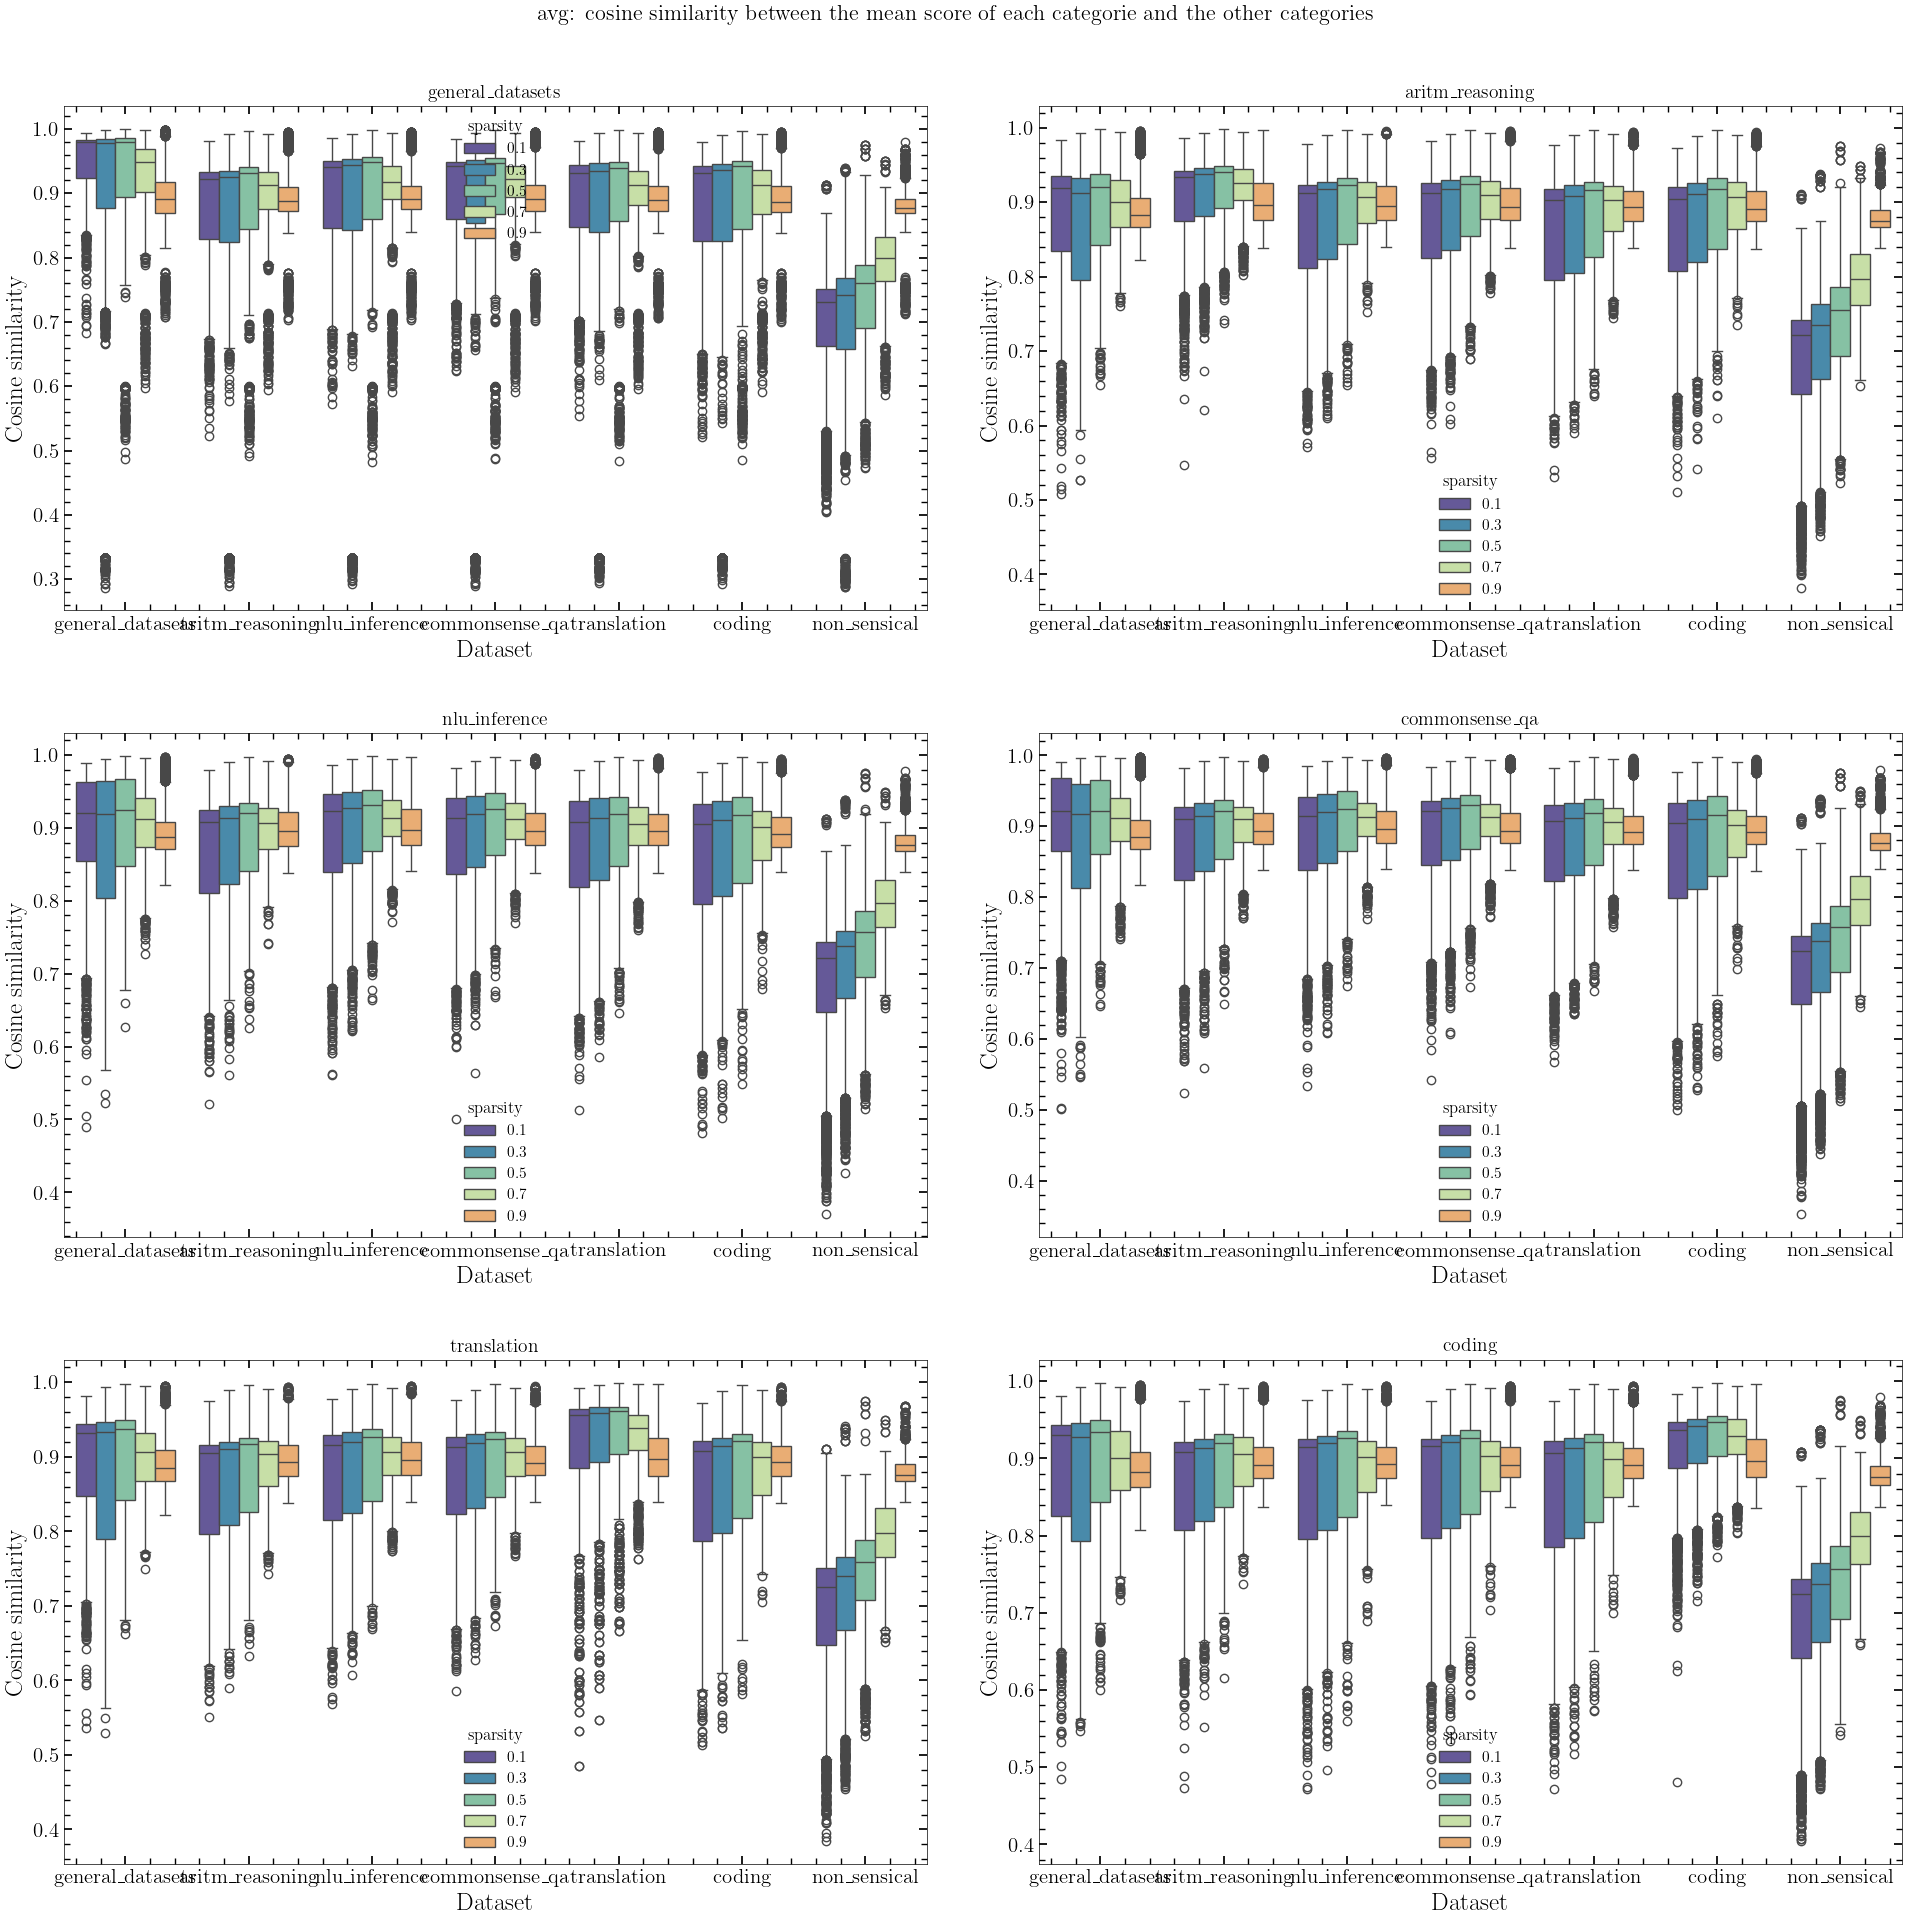

In [6]:
model_and_avg = ['avg'] # + model_list

for model in model_and_avg:
    
    if model == 'avg':
        results_cosine_similarity_model = results_cosine_similarity
    else:
        results_cosine_similarity_model = results_cosine_similarity[results_cosine_similarity["model"] == model]
    
    figure, ax = plt.subplots(3, 2, figsize=(20, 20))
    figure.suptitle(model + ": cosine similarity between the mean score of each categorie and the other categories", fontsize=16)

    x_index = 0
    y_index = 0
    
    for i in range(len(all_categories_names)):
        
        data_i = results_cosine_similarity_model[(results_cosine_similarity_model["source_group"] == all_categories_names[i]) & (results_cosine_similarity_model["comparison_group"] != "boh")]
        sns.boxplot(data=data_i, x="comparison_group", y="mean_similarity_wrt_comparison_group", hue="sparsity", ax=ax[y_index, x_index], palette=custom_palette)
        ax[y_index, x_index].set_title(all_categories_names[i], fontsize=14)
        ax[y_index, x_index].set_xlabel("Dataset")
        ax[y_index, x_index].set_ylabel("Cosine similarity")
        
        
        #if all_categories_names[i] != "boh":
            #ax[y_index, x_index].set_ylim(0.9, 1)
        
        x_index += 1
        if x_index == 2:
            x_index = 0
            y_index += 1


    figure.tight_layout(pad=3.0)
    plt.show()

<h1>Similarity w.r.t level (compact)</h1>

/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_4641/3475546376.py:22: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.lineplot(data=data_i, x="level", y="mean_similarity_wrt_comparison_group", hue="comparison_group", ax=ax[i], palette=custom_palette, alpha=0.3, err_style="band", marker="o") #, style="ci=95", markers=True, dashes=False)
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_4641/3475546376.py:22: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.lineplot(data=data_i, x="level", y="mean_similarity_wrt_comparison_group", hue="comparison_group", ax=ax[i], palette=custom_palette, alpha=0.3, err_style="band", marker="o") #, style="ci=95", markers=True, dashes=False)
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_4641/3475546376.py:22: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.lineplot(data=

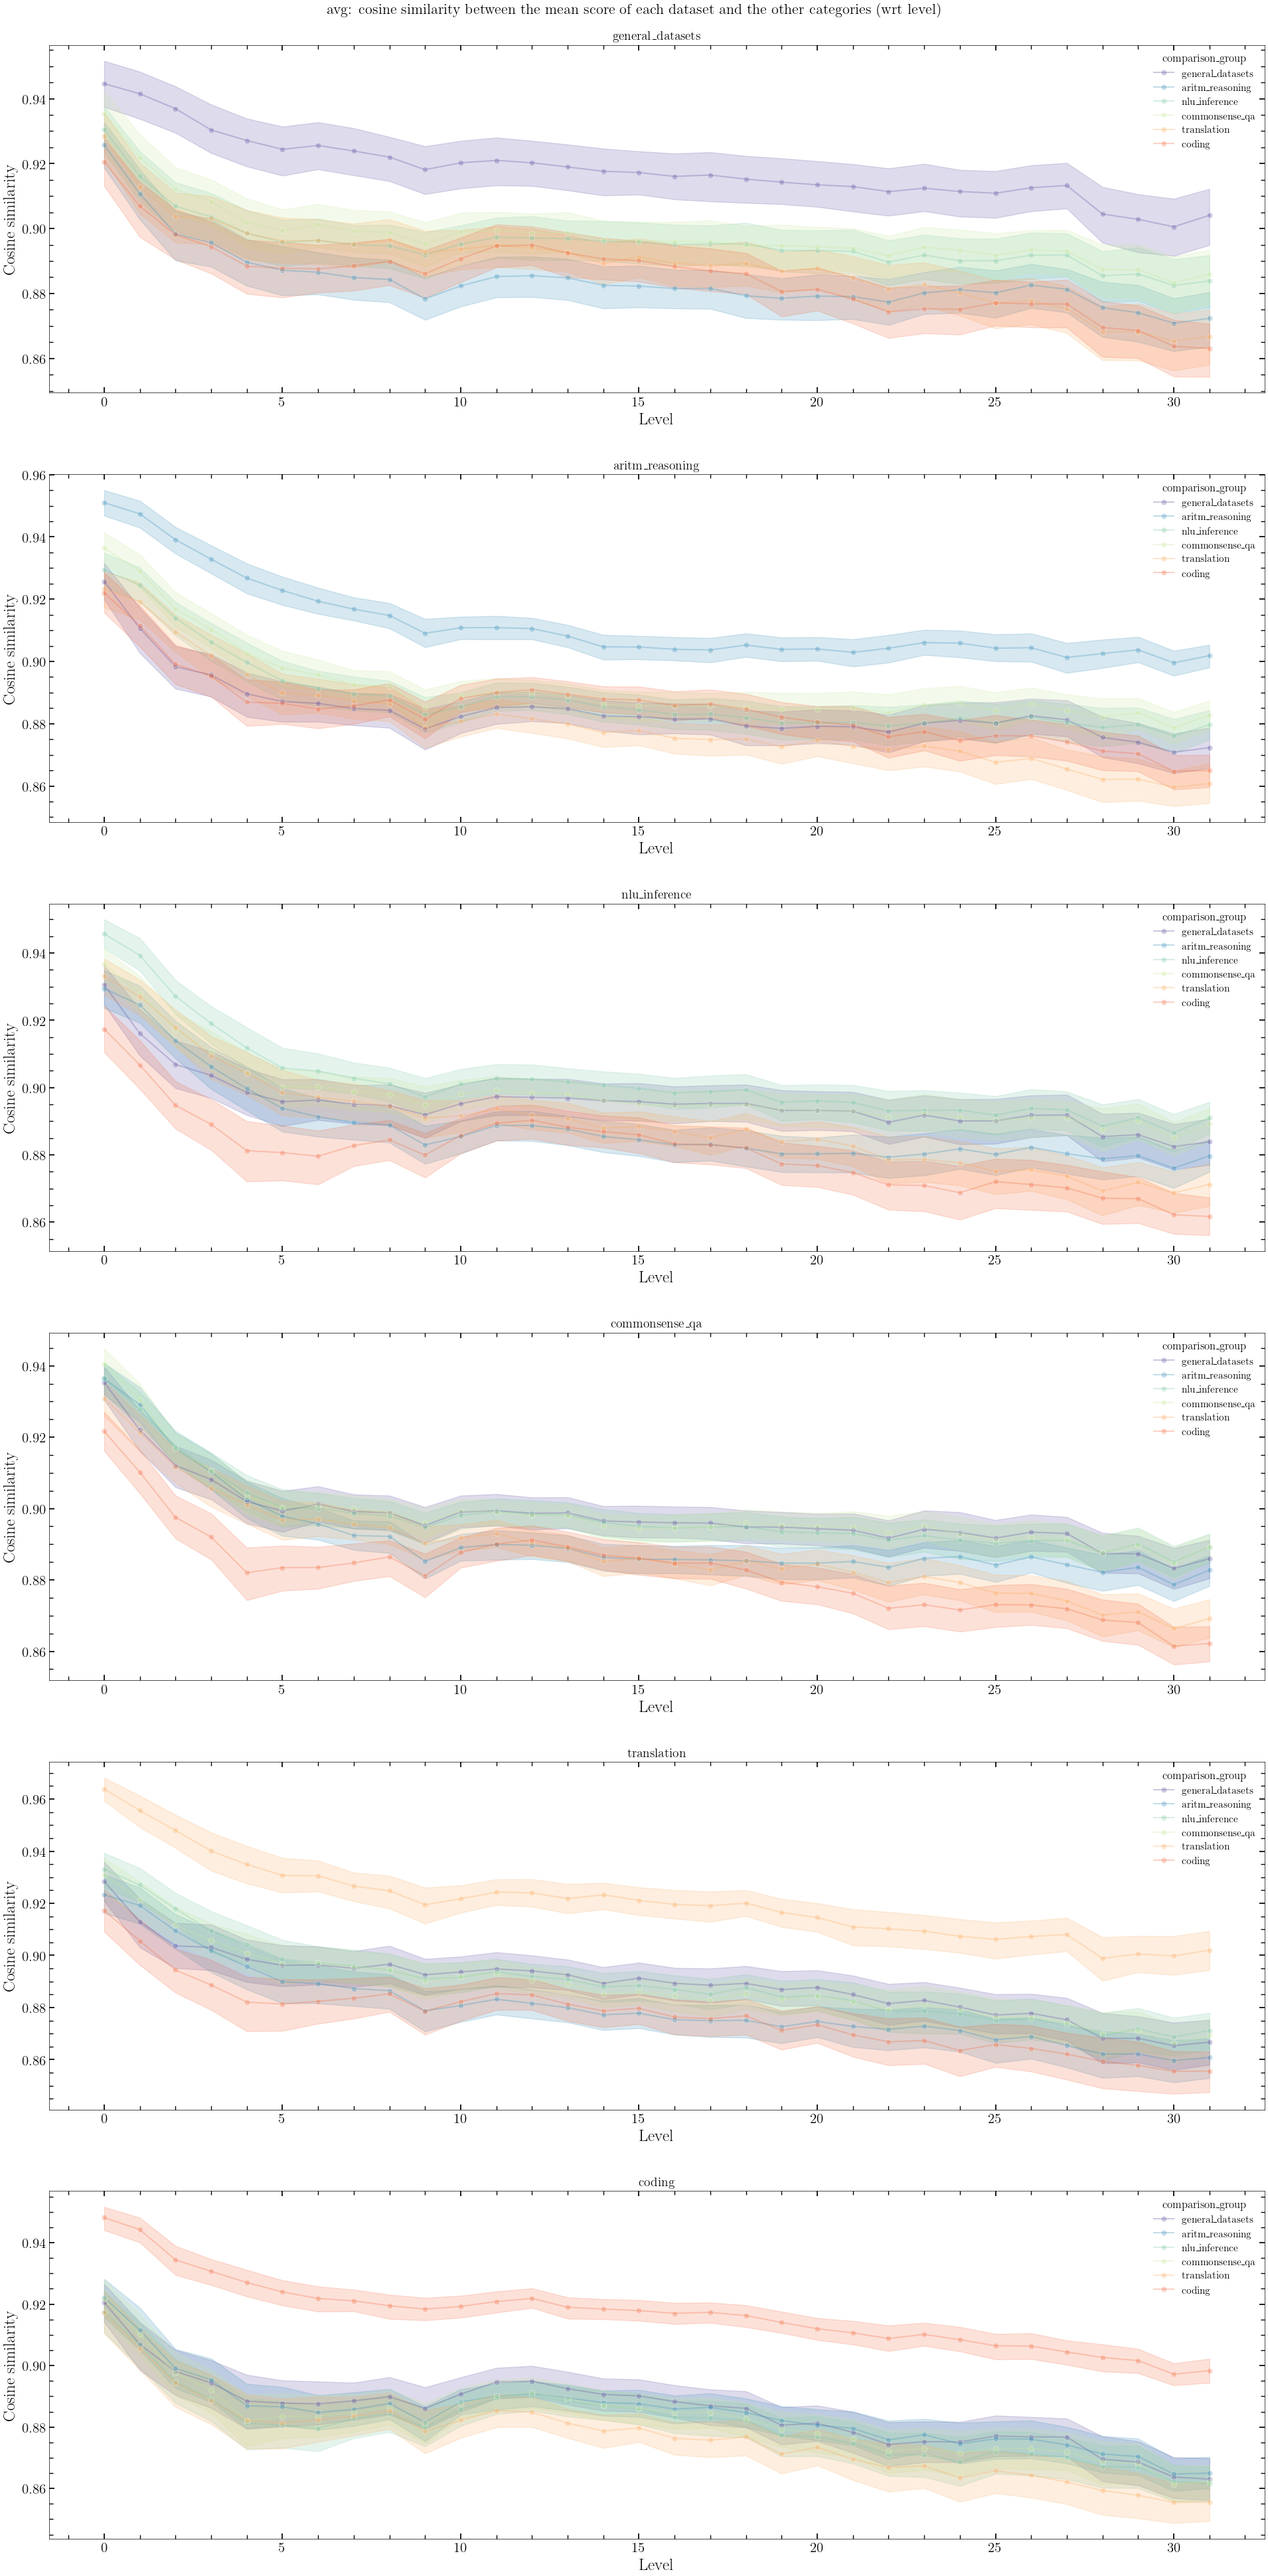

In [7]:
model_and_avg = ['avg'] # + model_list

for model in model_and_avg:
    
    if model == 'avg':
        results_cosine_similarity_model = results_cosine_similarity
    else:
        results_cosine_similarity_model = results_cosine_similarity[results_cosine_similarity["model"] == model]
        
    figure, ax = plt.subplots(len(all_categories_names), figsize=(20, 40))
    figure.suptitle(model + ": cosine similarity between the mean score of each dataset and the other categories (wrt level)", fontsize=16)


    for i in range(len(all_categories_names)):
        
        data_i = results_cosine_similarity_model[results_cosine_similarity_model["source_group"] == all_categories_names[i]]
        
        data_i = data_i[data_i["comparison_group"] != "non_sensical"]
        #data_i = results_cosine_similarity_model[(results_cosine_similarity_model["source_group"] == all_categories_names[i]) & (results_cosine_similarity_model["comparison_group"] != "boh") & (results_cosine_similarity_model["level"] == 31) & (results_cosine_similarity["comparison_group"] == "nlu_inference")]
        #data_i = results_cosine_similarity_model[(results_cosine_similarity_model["source_group"] == all_categories_names[i]) & (results_cosine_similarity_model["comparison_group"] != "boh") & (results_cosine_similarity_model["level"] == 31)]
        #print(data_i)
        sns.lineplot(data=data_i, x="level", y="mean_similarity_wrt_comparison_group", hue="comparison_group", ax=ax[i], palette=custom_palette, alpha=0.3, err_style="band", marker="o") #, style="ci=95", markers=True, dashes=False)
        
        ax[i].set_title(all_categories_names[i], fontsize=14)
        ax[i].set_xlabel("Level")
        ax[i].set_ylabel("Cosine similarity")
        
        #if all_categories_names[i] != "boh":
            #ax[y_index, x_index].set_ylim(0.9, 1)
        

    figure.tight_layout(pad=3.0)
    plt.show()

<h1>Similarity w.r.t level (extended)</h1>

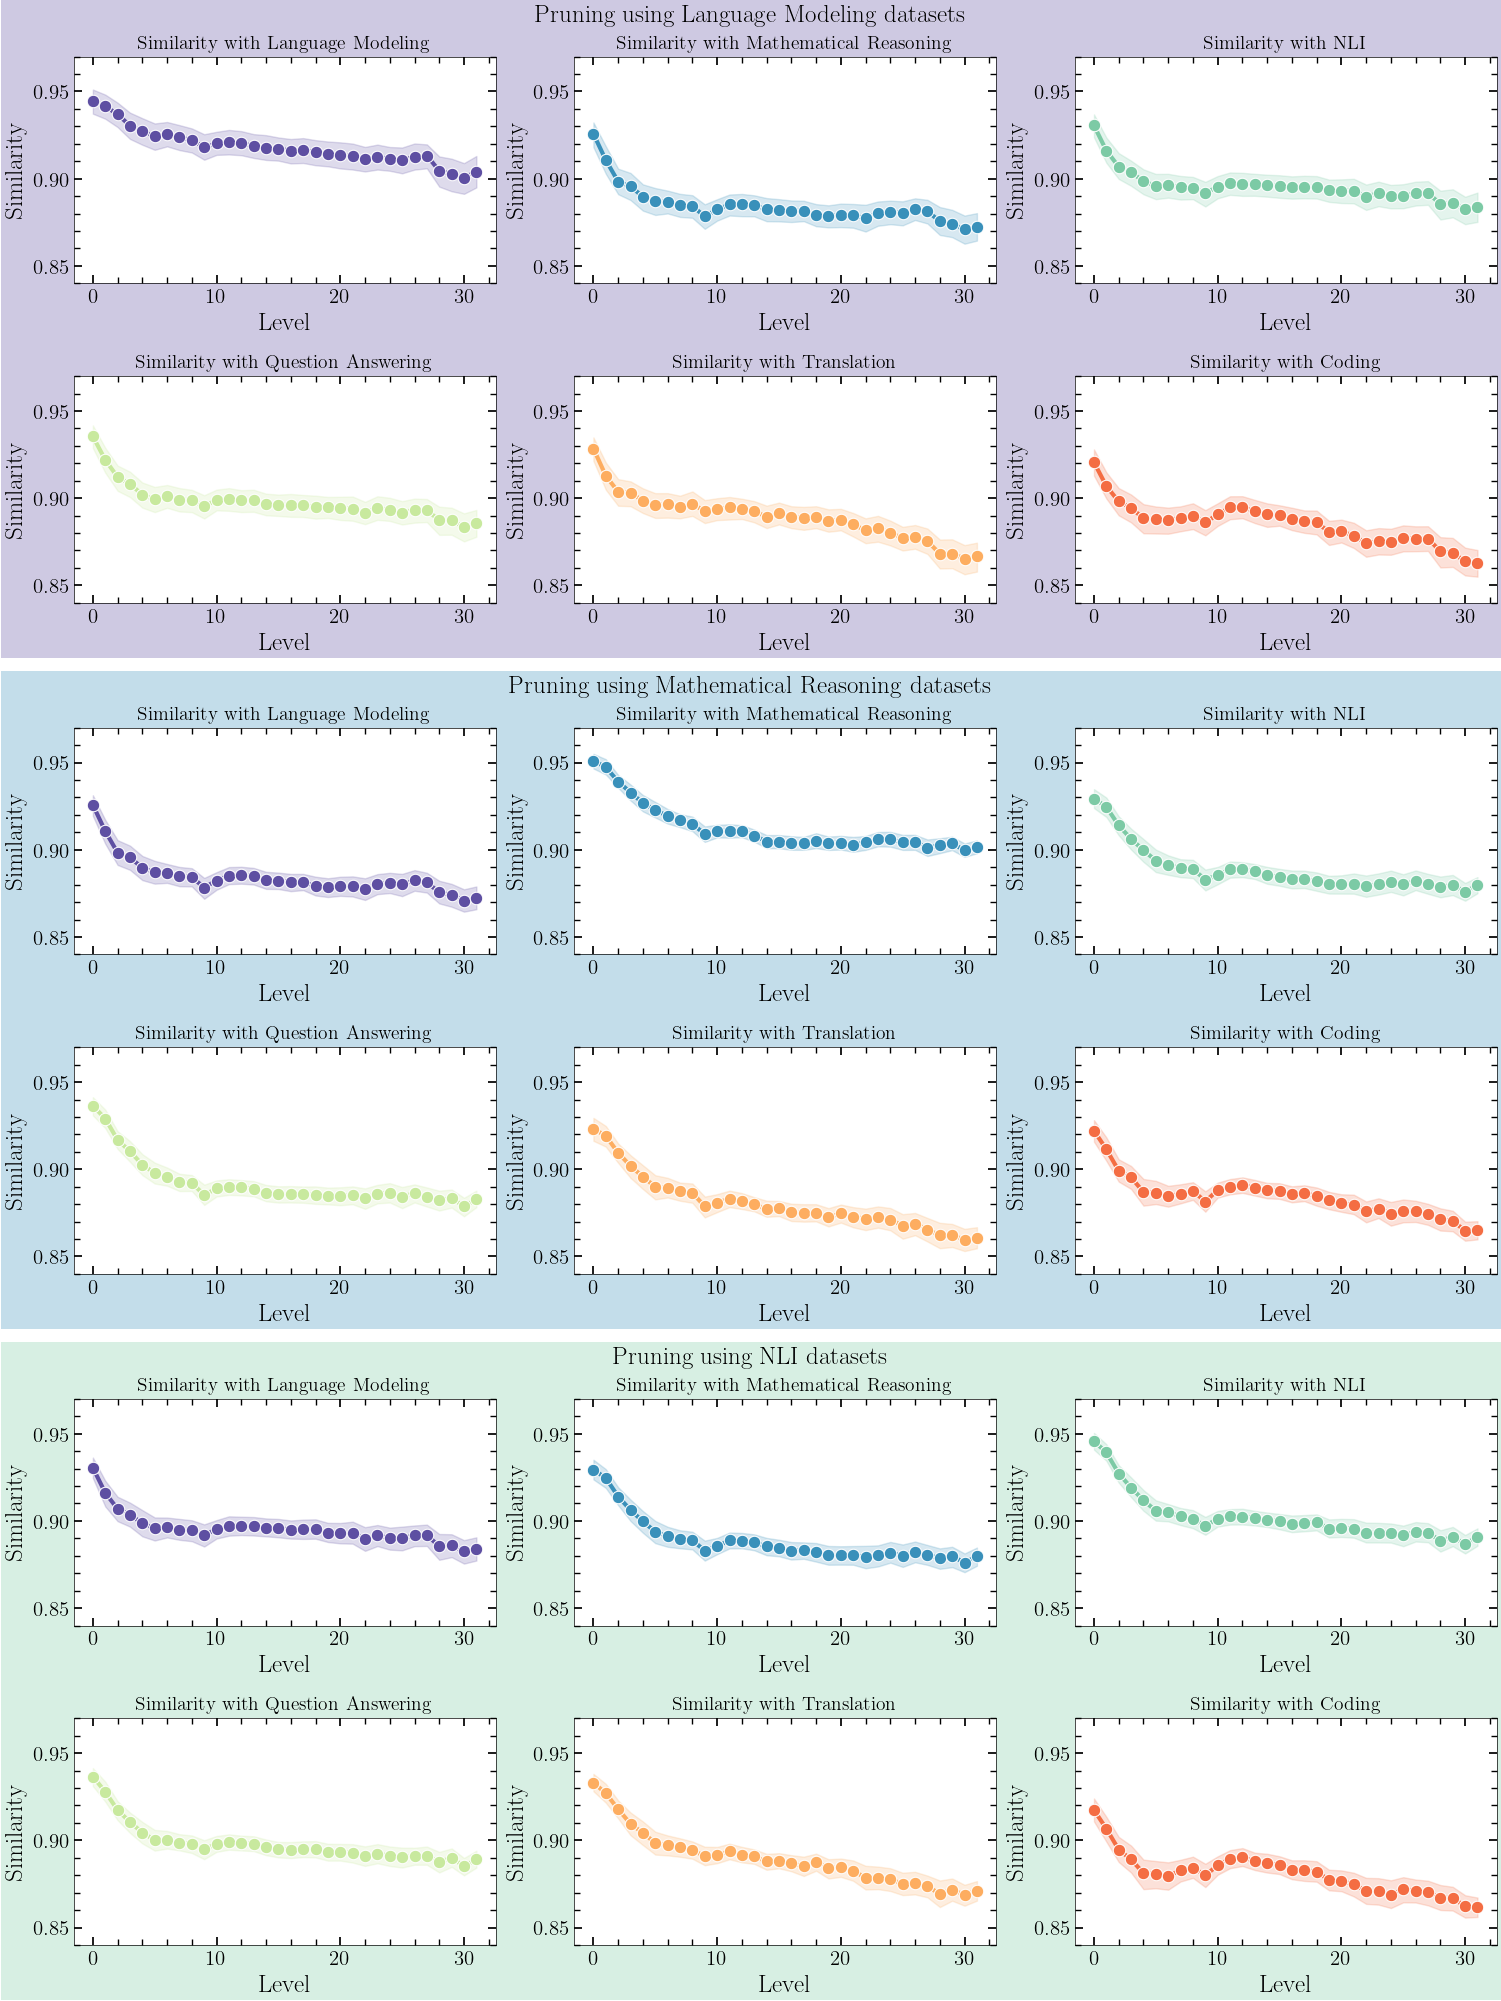

/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_4641/1600045603.py:55: UserWarning: The figure layout has changed to tight
  fig_1.tight_layout(pad=2.0)


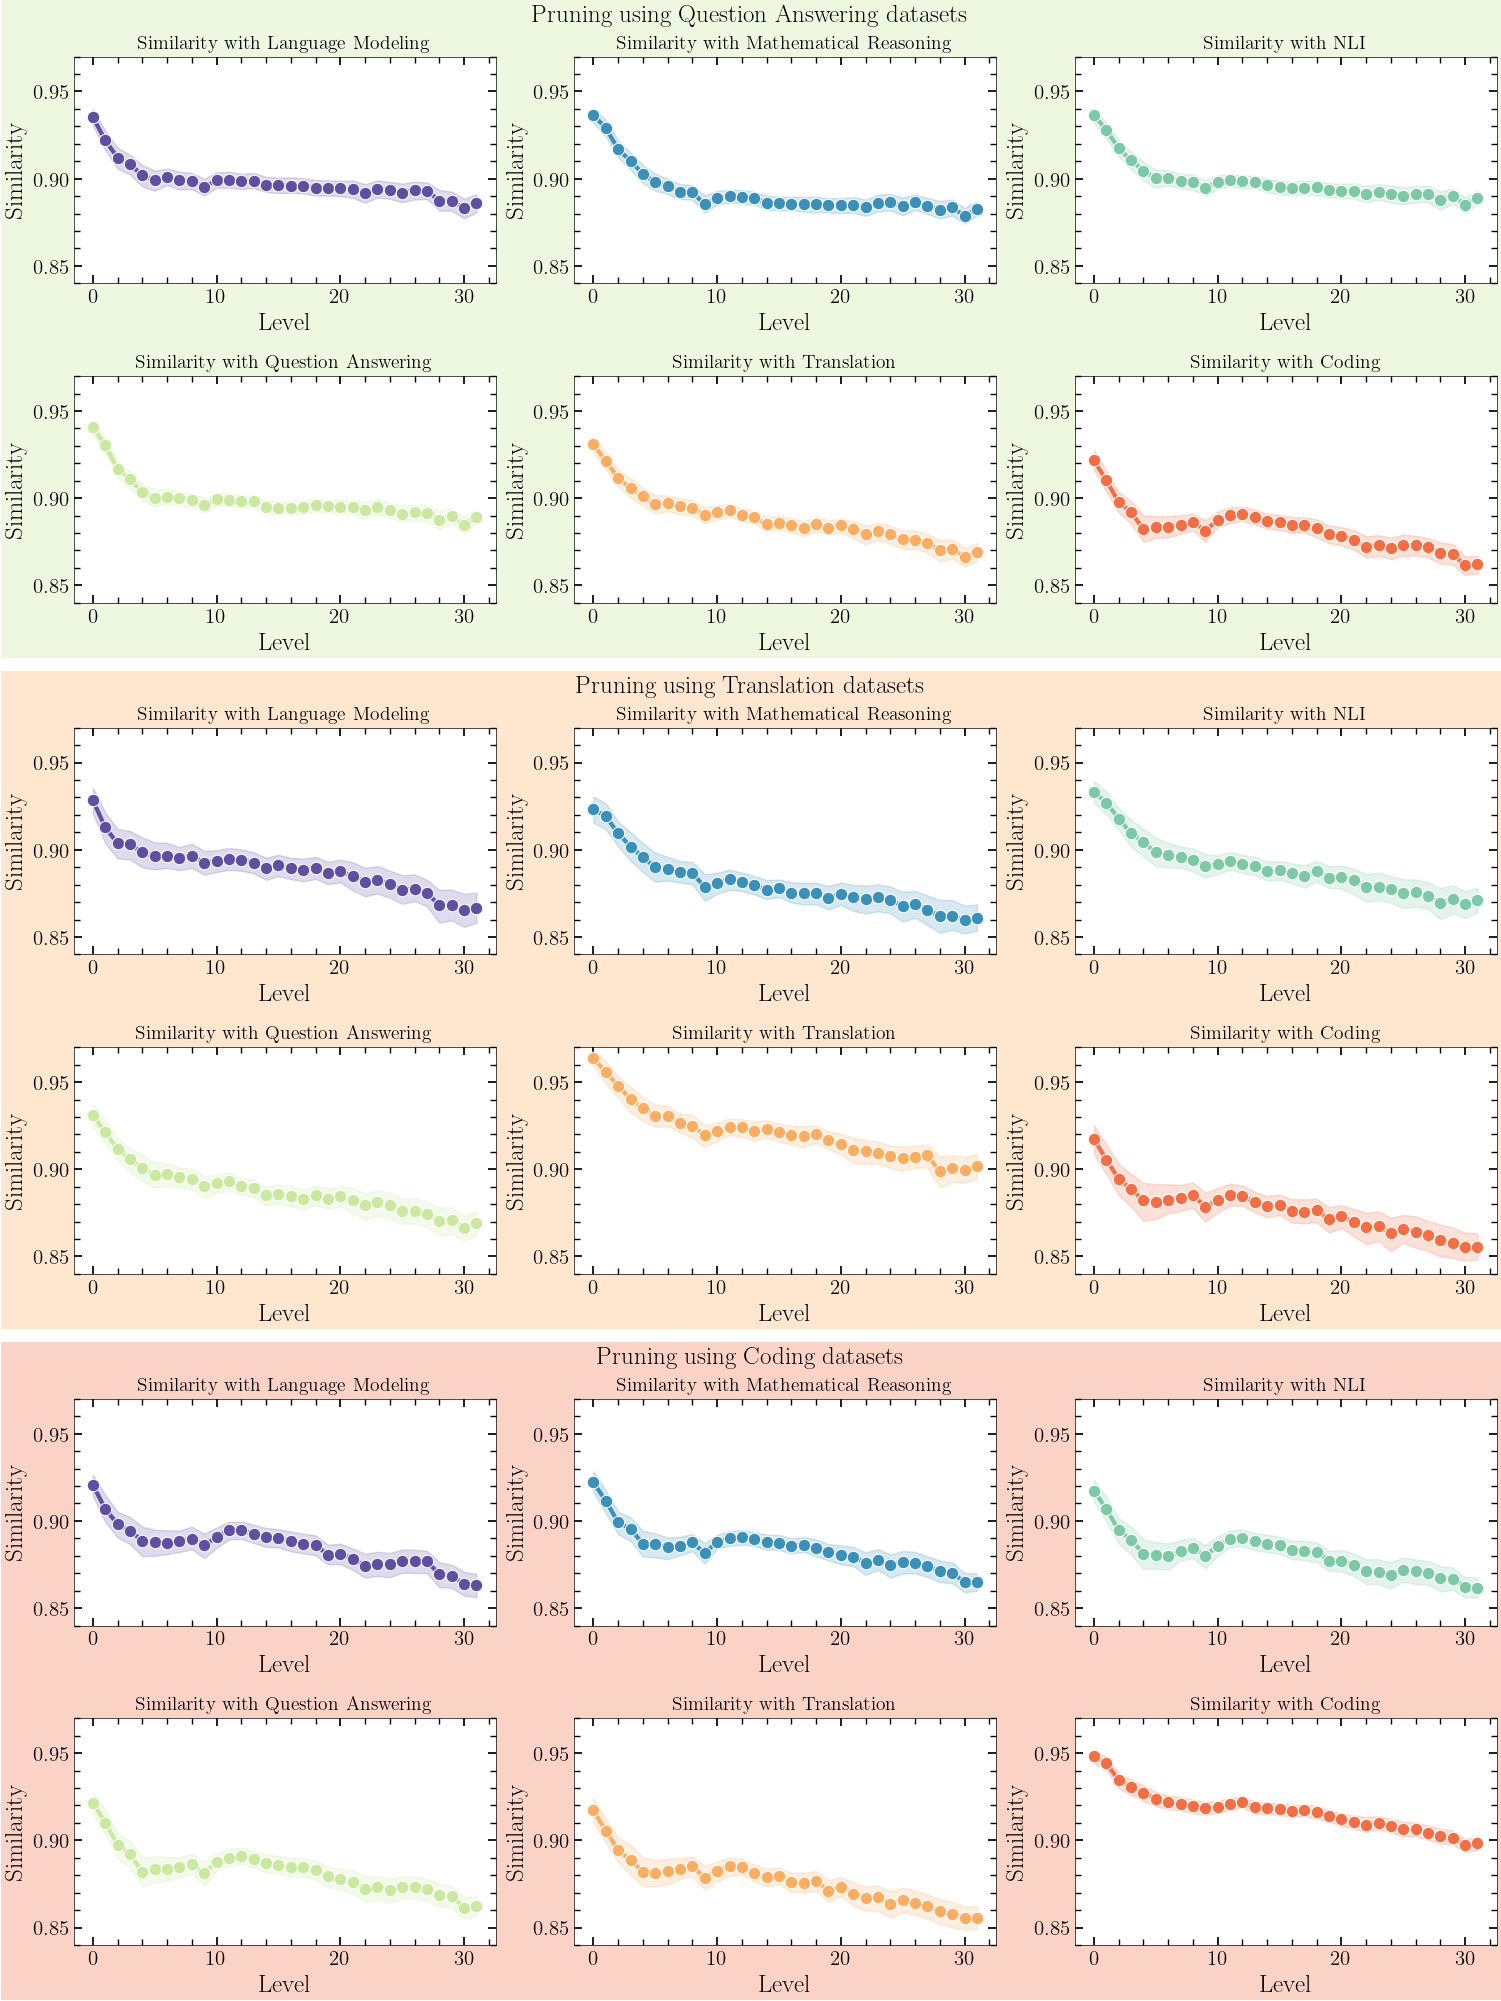

/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_4641/1600045603.py:66: UserWarning: The figure layout has changed to tight
  fig_2.tight_layout(pad=2.0)


In [8]:
colors_lineplot = custom_palette[0:6]

model_and_avg = ['avg'] # + model_list


def show_similarity_wrt_level(subfigs, starting_index=0, n_item=3):
    for i in range(n_item):
        axs = subfigs[i].subplots(2, 3)
        subfigs[i].suptitle("Pruning using " + all_categories_names_print[i+starting_index] + " datasets", fontsize=18)
        c = (colors_lineplot[i+starting_index][0], colors_lineplot[i+starting_index][1], colors_lineplot[i+starting_index][2], 0.3)
        subfigs[i].set_facecolor(c)
        counter_i = 0
        counter_j = 0
        for j in range(6):
            
            data_i = results_cosine_similarity_model[results_cosine_similarity_model["source_group"] == all_categories_names[i+starting_index]]

            
            data_i = data_i[data_i["comparison_group"] == all_categories_names[j]]
            #data_i = results_cosine_similarity_model[(results_cosine_similarity_model["source_group"] == all_categories_names[i]) & (results_cosine_similarity_model["comparison_group"] != "boh") & (results_cosine_similarity_model["level"] == 31) & (results_cosine_similarity["comparison_group"] == "nlu_inference")]
            #data_i = results_cosine_similarity_model[(results_cosine_similarity_model["source_group"] == all_categories_names[i]) & (results_cosine_similarity_model["comparison_group"] != "boh") & (results_cosine_similarity_model["level"] == 31)]
            #print(data_i)
            
            sns.lineplot(data=data_i, x="level", y="mean_similarity_wrt_comparison_group", ax=axs[counter_j,counter_i], color=colors_lineplot[j], marker="o", linewidth=3, markersize=9) #, style="ci=95", markers=True, dashes=False)
            
            axs[counter_j,counter_i].set_title("Similarity with " + all_categories_names_print[j], fontsize=14)
            axs[counter_j,counter_i].set_xlabel("Level")
            axs[counter_j,counter_i].set_ylabel("Similarity")
            
            axs[counter_j,counter_i].set_ylim(0.84, 0.97)
            
            counter_i += 1
            if counter_i == 3:
                counter_i = 0
                counter_j += 1
        
    plt.show()
        


for model in model_and_avg:
    
    if model == 'avg':
        results_cosine_similarity_model = results_cosine_similarity
    else:
        results_cosine_similarity_model = results_cosine_similarity[results_cosine_similarity["model"] == model]
    
    fig_1 = plt.figure(layout='constrained', figsize=(15, 20))
    
    if model != 'avg':
        fig_1.suptitle(model, fontsize=22)
    
    subfigs_1 = fig_1.subfigures(3, wspace=0.07)
    show_similarity_wrt_level(subfigs_1, starting_index=0)
    fig_1.tight_layout(pad=2.0)
    
    
    
    fig_2 = plt.figure(layout='constrained', figsize=(15, 20))
    
    if model != 'avg':
        fig_2.suptitle(model, fontsize=22)
    
    subfigs_2 = fig_2.subfigures(3, wspace=0.07)
    show_similarity_wrt_level(subfigs_2, starting_index=3)
    fig_2.tight_layout(pad=2.0)



<h1>Results for different components</h1>

In [9]:
"""
for model in model_list:
    
    results_cosine_similarity_model = results_cosine_similarity[results_cosine_similarity["model"] == model]
        
    figure, ax = plt.subplots(len(all_categories_names), figsize=(20, 40))
    figure.suptitle(model + ": cosine similarity between the mean score of each dataset and the other categories (wrt components)", fontsize=16)

    for i in range(len(all_categories_names)):
        
        components_names = [element for element in dictionary_components[model].values()]
        
        #data_i = results_cosine_similarity_model[results_cosine_similarity_model["source_group"] == all_categories_names[i]]
        data_i = results_cosine_similarity_model[(results_cosine_similarity_model["source_group"] == all_categories_names[i]) & (results_cosine_similarity_model["comparison_group"] != "boh")]
        sns.boxplot(data=data_i, x="component", y="mean_similarity_wrt_comparison_group", hue="comparison_group", ax=ax[i], palette=custom_palette)
        ax[i].set_title(all_categories_names[i], fontsize=12)
        ax[i].set_xticklabels(components_names, rotation=45, ha='center', fontsize=14)
        
        ax[i].set_xlabel("Component")
        ax[i].set_ylabel("Cosine similarity")
        
        #if all_categories_names[i] != "boh":
            #ax[y_index, x_index].set_ylim(0.9, 1)
        
    figure.tight_layout(pad=3.0)
    plt.show()"""

'\nfor model in model_list:\n    \n    results_cosine_similarity_model = results_cosine_similarity[results_cosine_similarity["model"] == model]\n        \n    figure, ax = plt.subplots(len(all_categories_names), figsize=(20, 40))\n    figure.suptitle(model + ": cosine similarity between the mean score of each dataset and the other categories (wrt components)", fontsize=16)\n\n    for i in range(len(all_categories_names)):\n        \n        components_names = [element for element in dictionary_components[model].values()]\n        \n        #data_i = results_cosine_similarity_model[results_cosine_similarity_model["source_group"] == all_categories_names[i]]\n        data_i = results_cosine_similarity_model[(results_cosine_similarity_model["source_group"] == all_categories_names[i]) & (results_cosine_similarity_model["comparison_group"] != "boh")]\n        sns.boxplot(data=data_i, x="component", y="mean_similarity_wrt_comparison_group", hue="comparison_group", ax=ax[i], palette=custom_pal